In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
data['Gender']=data['Gender'].map({'Female':0,'Male':1}).astype(int)

In [6]:
df = pd.DataFrame(data)

In [8]:
df_clustering = df.drop('CustomerID', axis=1)

In [9]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

In [11]:
def find_optimal_clusters(data, max_k):
    inertia = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return inertia

In [12]:
inertia = find_optimal_clusters(df_scaled, 10)

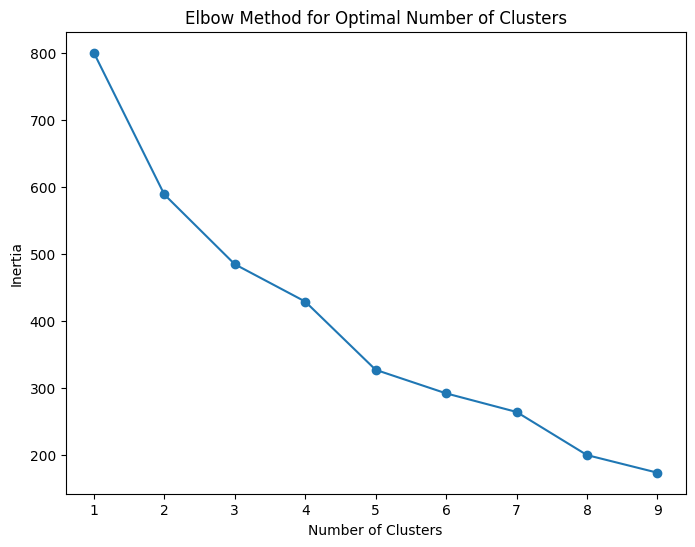

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters)
df['Cluster'] = kmeans.fit_predict(df_scaled)

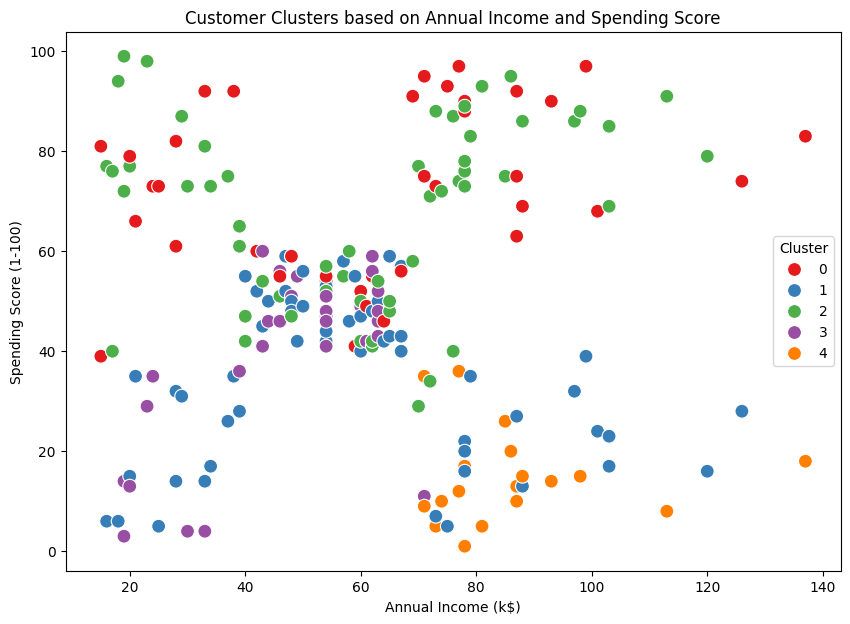

In [15]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [16]:
cluster_summary = df.groupby('Cluster').mean().reset_index()
print("Note: 1 represents Male and 0 represents Female")
print(cluster_summary.to_string(index=False))

# Save the clustered data
data.to_csv('clustered_customers.csv', index=False) 

Note: 1 represents Male and 0 represents Female
 Cluster  CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
       0  103.375000     1.0 28.250000           62.000000               71.675000
       1   94.818182     0.0 48.109091           58.818182               34.781818
       2  100.210526     0.0 28.438596           59.666667               67.684211
       3   68.172414     1.0 56.620690           47.034483               39.034483
       4  161.105263     1.0 38.473684           85.894737               14.210526
